## Abbandono scolastico

Il dataset **Abbandono scolastico** contiene **10.000 osservazioni** relative a studenti delle scuole secondarie, create in modo realistico per analizzare i fattori che influenzano la **probabilità di abbandono o non ammissione** all’anno scolastico successivo.

L’obiettivo dell’analisi è sviluppare un modello predittivo basato su tecniche di **machine learning** in grado di stimare, per ciascuno studente, la probabilità di non completare con successo l’anno scolastico.  
Attraverso la valutazione congiunta di caratteristiche scolastiche, personali e socio-economiche, il progetto mira a fornire strumenti utili per la prevenzione del rischio di abbandono e per la pianificazione di interventi educativi mirati.

---

### Obiettivi principali

- **Identificare** gli studenti più esposti a situazioni di rischio scolastico o non ammissione;  
- **Quantificare** il rischio di abbandono tramite modelli statistici e predittivi (espressi in probabilità percentuale);  
- **Evidenziare** i fattori più significativi che influenzano il rendimento e la continuità scolastica;  
- **Fornire** un supporto ai docenti e agli istituti per interventi preventivi e azioni correttive basate su evidenze oggettive.

---

### Descrizione delle variabili principali

| Variabile | Tipo | Descrizione |
|------------|------|-------------|
| **Eta** | numerica intera | Età dello studente espressa in anni. Può influenzare la maturità e la stabilità del percorso scolastico. |
| **Assenze** | numerica intera | Numero totale di giorni di assenza durante l’anno. Valori elevati possono segnalare disimpegno o difficoltà di partecipazione. |
| **Voti_medi** | numerica continua | Media aritmetica dei voti ottenuti nelle principali materie (scala 1–10). Indice diretto del rendimento scolastico. |
| **Ripetenze** | numerica intera | Numero di anni scolastici ripetuti. Può riflettere difficoltà di apprendimento o irregolarità nel percorso formativo. |
| **Cambi_scuola** | numerica intera | Numero di trasferimenti o cambi di istituto. Può essere indice di instabilità educativa o discontinuità didattica. |
| **ISEE** | numerica continua | Indicatore della condizione economica familiare (in euro). Valori più bassi possono essere correlati a maggiori rischi di esclusione. |
| **Partecipazione_progetti** | numerica intera | Numero di attività o progetti extracurricolari a cui lo studente ha partecipato. Indica il grado di coinvolgimento scolastico. |
| **Distanza_scuola** | numerica continua | Distanza stimata (in km) tra l’abitazione e la scuola. Può incidere sulla frequenza regolare e sulla puntualità. |
| **Autovalutazione** | numerica ordinata | Valutazione soggettiva espressa dallo studente sul proprio rendimento (scala 1–5). Riflette la percezione di autoefficacia. |
| **Ammesso** | binaria (target) | Variabile target: indica se lo studente è stato **ammesso (1)** o **non ammesso (0)** all’anno successivo. |

---

### Finalità del progetto

L’analisi del dataset *Abbandono scolastico* ha come scopo la **previsione e prevenzione** del rischio di abbandono, promuovendo una visione data-driven dell’inclusione educativa.  
Il modello sviluppato consente di stimare la probabilità individuale di non ammissione, fornendo:
- un supporto informativo agli insegnanti e ai dirigenti scolastici;
- un punto di partenza per la costruzione di dashboard di monitoraggio predittivo;
- una base dati utile per ulteriori studi sul rendimento e la dispersione scolastica.

---

### Scopo finale

Il progetto mira a integrare l’analisi dei dati scolastici in un contesto di **prevenzione educativa**, offrendo uno strumento capace di individuare precocemente situazioni di rischio e di orientare le politiche scolastiche verso un’istruzione più equa, partecipata e consapevole.

---




## 1) Caricamento e preparazione del dataset

In questa sezione importiamo il dataset contenente le informazioni sugli studenti.  
L’obiettivo è:
- leggere correttamente il file `.csv`
- gestire eventuali righe corrotte o formattate in modo errato;
- verificare che il numero di righe lette coincida con quello atteso.

Questo passaggio assicura che i dati siano stati importati senza errori prima di procedere con l’analisi esplorativa.


In [1]:
import pandas as pd

# Lista per salvare eventuali righe problematiche
bad_lines = []

# Funzione di gestione righe corrotte
def bad_line_handler(line):
    bad_lines.append(line)
    return None  # salta la riga problematica

# Caricamento del dataset
df = pd.read_csv("dataset_studenti_10k_union.csv", on_bad_lines=bad_line_handler, engine="python", encoding="utf-8")

# Report di lettura
print("Righe lette correttamente:", len(df))
print("Righe problematiche:", len(bad_lines))
# Mostra i tipi di dato inferiti da Pandas
print("📋 Tipi di dato rilevati da Pandas:\n")
print(df.dtypes)
print("\n───────────────────────────────\n")


Righe lette correttamente: 10000
Righe problematiche: 0
📋 Tipi di dato rilevati da Pandas:

Eta                          int64
Genere                      object
Assenze                      int64
Voti_medi                  float64
Ripetenze                    int64
Cambi_scuola                 int64
ISEE                       float64
Lavoro_genitori             object
Titolo_studio_genitori      object
Partecipazione_progetti      int64
Distanza_scuola             object
Autovalutazione             object
Ammesso                      int64
dtype: object

───────────────────────────────



## 2) Preprocessing delle variabili categoriali

In questa sezione viene definita la funzione `preprocess_data()`, utilizzata per **preparare il dataset all’addestramento del modello di machine learning**.  
L’obiettivo è convertire automaticamente le **variabili categoriali** (testuali) in **valori numerici** interpretabili dagli algoritmi di apprendimento, mantenendo intatte le colonne già numeriche e **escludendo il target (`Ammesso`)**.

Il preprocessing è una fase cruciale perché:
- garantisce **coerenza dei dati** tra training e predizione;
- consente di gestire in modo sicuro valori mancanti o categorie nuove mai viste in fase di addestramento;
- assicura la **riproducibilità** del flusso di lavoro.

L’encoder utilizzato è `OrdinalEncoder` di *scikit-learn*, configurato per:
- assegnare automaticamente un codice numerico a ogni categoria;
- gestire valori sconosciuti tramite `unknown_value=-1`, evitando errori in fase di produzione;
- restituire un **DataFrame completamente numerico** e pronto per l’addestramento del modello.

Alla fine della cella di codice, la funzione restituisce:
- `df_proc`: il DataFrame preprocessato;
- `encoder`: l’oggetto fittato, da salvare insieme al modello per garantire coerenza tra training e inferenza.


In [2]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

def preprocess_data(df, target="Ammesso", verbose=True):
    """
    Preprocessing per dataset studenti:
    - converte 'Autovalutazione' in numerico (se presente)
    - identifica e codifica le colonne categoriali (object) con OrdinalEncoder
    - esclude il target dal preprocessing
    - restituisce un DataFrame completamente numerico + encoder fittato
    """
    df_proc = df.copy()

    # 1) Conversione 'Autovalutazione' -> numerico (se esiste)
    if "Autovalutazione" in df_proc.columns:
        df_proc["Autovalutazione"] = pd.to_numeric(df_proc["Autovalutazione"], errors="coerce")
        if verbose:
            print("✔️ 'Autovalutazione' convertita in numerico (float).")

    # 2) Individua le colonne non numeriche (object), escludendo il target
    cat_cols = [
        c for c in df_proc.columns
        if c != target and not pd.api.types.is_numeric_dtype(df_proc[c])
    ]
    if verbose:
        print(f"Colonne categoriali da codificare: {cat_cols}")

    # 3) Ordinal encoding (robusto a categorie nuove)
    encoder = None
    if cat_cols:
        encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        # cast a string per evitare problemi con mix di tipi / NaN
        df_proc[cat_cols] = encoder.fit_transform(df_proc[cat_cols].astype(str))
        if verbose:
            print(f"✔️ Codificate {len(cat_cols)} colonne categoriali con OrdinalEncoder.")

    # 4) Verifica finale
    non_num = df_proc.select_dtypes(exclude="number").columns.tolist()
    if non_num:
        print("⚠️ Colonne non numeriche residue:", non_num)
    else:
        if verbose:
            print("✅ Tutte le feature sono numeriche (target escluso).")
    return df_proc, encoder

df_prep, enc = preprocess_data(df, target="Ammesso", verbose=True)



✔️ 'Autovalutazione' convertita in numerico (float).
Colonne categoriali da codificare: ['Genere', 'Lavoro_genitori', 'Titolo_studio_genitori', 'Distanza_scuola']
✔️ Codificate 4 colonne categoriali con OrdinalEncoder.
✅ Tutte le feature sono numeriche (target escluso).


## 3) Pulizia base e controllo del target
### Obiettivo della sezione
Eseguire i controlli preliminari sul dataset per garantire qualità e coerenza prima del preprocessing e del training:
- normalizzare i nomi colonna;
- verificare la presenza del **target** (`Ammesso`);
- controllare dimensioni, duplicati e valori mancanti;
- produrre statistiche descrittive solo per le **feature numeriche**;
- visualizzare la distribuzione del target (conteggi + percentuali).

In [3]:
import pandas as pd

# 1) Normalizza i nomi colonna
df.columns = df.columns.str.strip()

# 2) Verifica presenza target
target = "Ammesso"
if target not in df.columns:
    raise KeyError(f"Target '{target}' non trovato. Colonne disponibili: {list(df.columns)}")

# 3) Controlli di base: shape, duplicati, NA (totali)
dup = df.duplicated().sum()
na_tot = int(df.isna().sum().sum())
print(f"Shape: {df.shape} | Duplicati: {dup} | Valori mancanti (tot): {na_tot}")

# 4) Statistiche descrittive (solo numeriche, trasposte)
num_cols = df.select_dtypes(include=["number"]).columns
display(df[num_cols].describe().T)

# 5) Distribuzione del target (conteggio + %)
vc = df[target].value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(2)
display(pd.DataFrame({"count": vc, "%": pct}))


Shape: (10000, 13) | Duplicati: 0 | Valori mancanti (tot): 0


,count,mean,std,min,25%,50%,75%,max
Eta,10000.0,14.96140,2.568106,11.00,13.000,15.00,17.0000,19.0
Assenze,10000.0,29.99880,17.725931,0.00,14.000,30.00,45.0000,60.0
Voti_medi,10000.0,7.22496,1.192089,2.96,6.420,7.23,8.0300,10.0
Ripetenze,10000.0,0.14110,0.401506,0.00,0.000,0.00,0.0000,2.0
Cambi_scuola,10000.0,0.47010,0.725644,0.00,0.000,0.00,1.0000,3.0
ISEE,10000.0,21043.03459,12552.074758,1726.85,11991.715,17887.39,26628.9225,60000.0
Partecipazione_progetti,10000.0,4.97410,3.139333,0.00,2.000,5.00,8.0000,10.0
Ammesso,10000.0,0.55730,0.496731,0.00,0.000,1.00,1.0000,1.0


,count,%
Ammesso,,
1,5573,55.73
0,4427,44.27


## 4) Correlazioni e relazione col target
L’obiettivo di questa fase è analizzare la **relazione tra le variabili numeriche del dataset** e la variabile target `Ammesso`.  
L’analisi di correlazione consente di:
- valutare **quanto fortemente** ciascuna variabile è legata al target;
- individuare eventuali **ridondanze** tra variabili (multicollinearità);
- comprendere in modo preliminare **quali feature** potrebbero influire maggiormente sulla predizione finale.


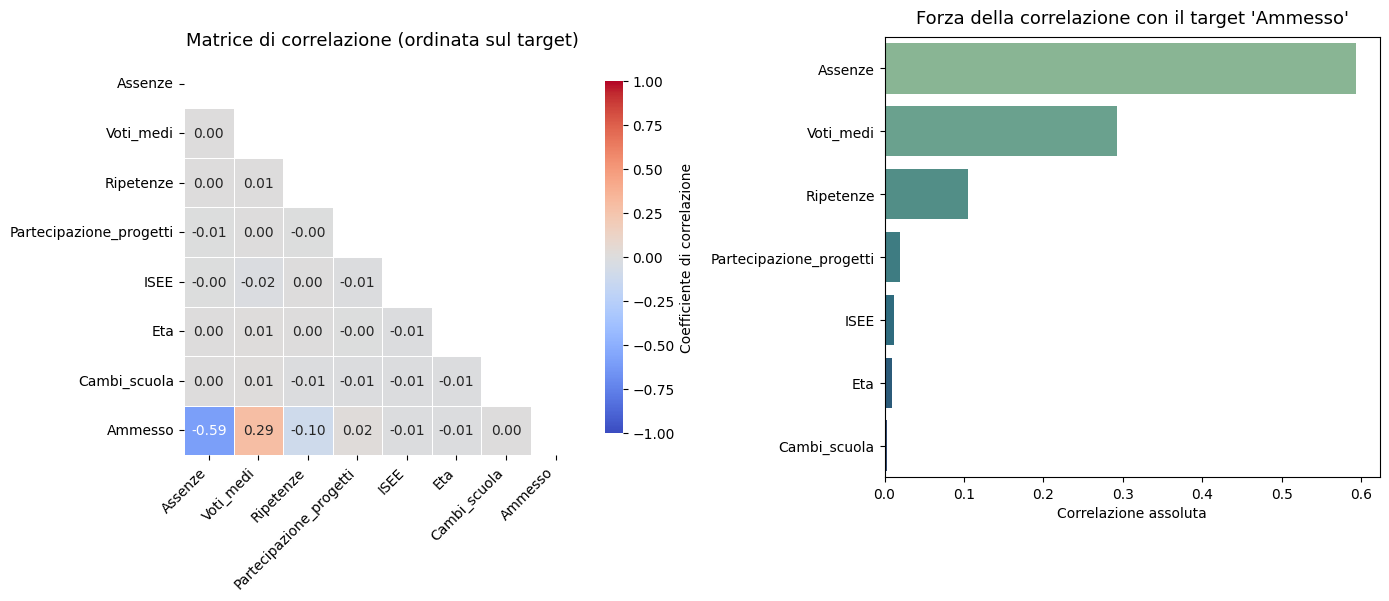

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target = "Ammesso"

# 1) Matrice di correlazione (solo numeriche)
num_cols = df.select_dtypes(include=["number"]).columns
if target not in num_cols:
    raise ValueError(f"Il target '{target}' non è numerico o non esiste tra le colonne numeriche: {list(num_cols)}")

corr = df[num_cols].corr()

# 2) Ordina feature per correlazione assoluta col target (escludendo il target)
order = (
    corr[target]
    .drop(target)
    .abs()
    .sort_values(ascending=False)
    .index
)
# metto il target in coda (così colonna/riga target è l’ultima)
ordered = list(order) + [target]
corr_ord = corr.loc[ordered, ordered]

# 3) Serie per il barplot (top N opzionale)
top_corr = (
    corr[target]
    .drop(target)
    .abs()
    .sort_values(ascending=False)
    .to_frame("correlazione_assoluta")
)
# se vuoi limitare le barre, usa .head(8)

# 4) Figura combinata: heatmap (triangolo) + barplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap triangolare ordinata
mask = np.triu(np.ones_like(corr_ord, dtype=bool))  # nasconde triangolo superiore
sns.heatmap(
    corr_ord,
    mask=mask,
    ax=axes[0],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1, center=0,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Coefficiente di correlazione"},
    linewidths=0.5,
    linecolor="white"
)
axes[0].set_title("Matrice di correlazione (ordinata sul target)", fontsize=13, pad=10)
# Ruota e allinea le etichette dell'asse X della heatmap
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")

# Barplot: forza della correlazione col target (compatibile con Seaborn ≥0.13)
sns.barplot(
    x="correlazione_assoluta",
    y=top_corr.index,
    hue=top_corr.index,     # evita FutureWarning
    data=top_corr,
    palette="crest",
    legend=False,
    ax=axes[1]
)
axes[1].set_xlabel("Correlazione assoluta")
axes[1].set_ylabel("")
axes[1].set_title(f"Forza della correlazione con il target '{target}'", fontsize=13, pad=10)

plt.tight_layout()
plt.show()


## 5) Analisi delle distribuzioni con Boxplot
I boxplot permettono di:
- osservare la distribuzione delle variabili numeriche;
- individuare outlier o valori estremi;
- confrontare le variabili rispetto alla variabile target `Ammesso`.

In questa sezione visualizziamo i boxplot per ciascuna feature numerica, separando i valori tra studenti **ammessi (1)** e **non ammessi (0)**.


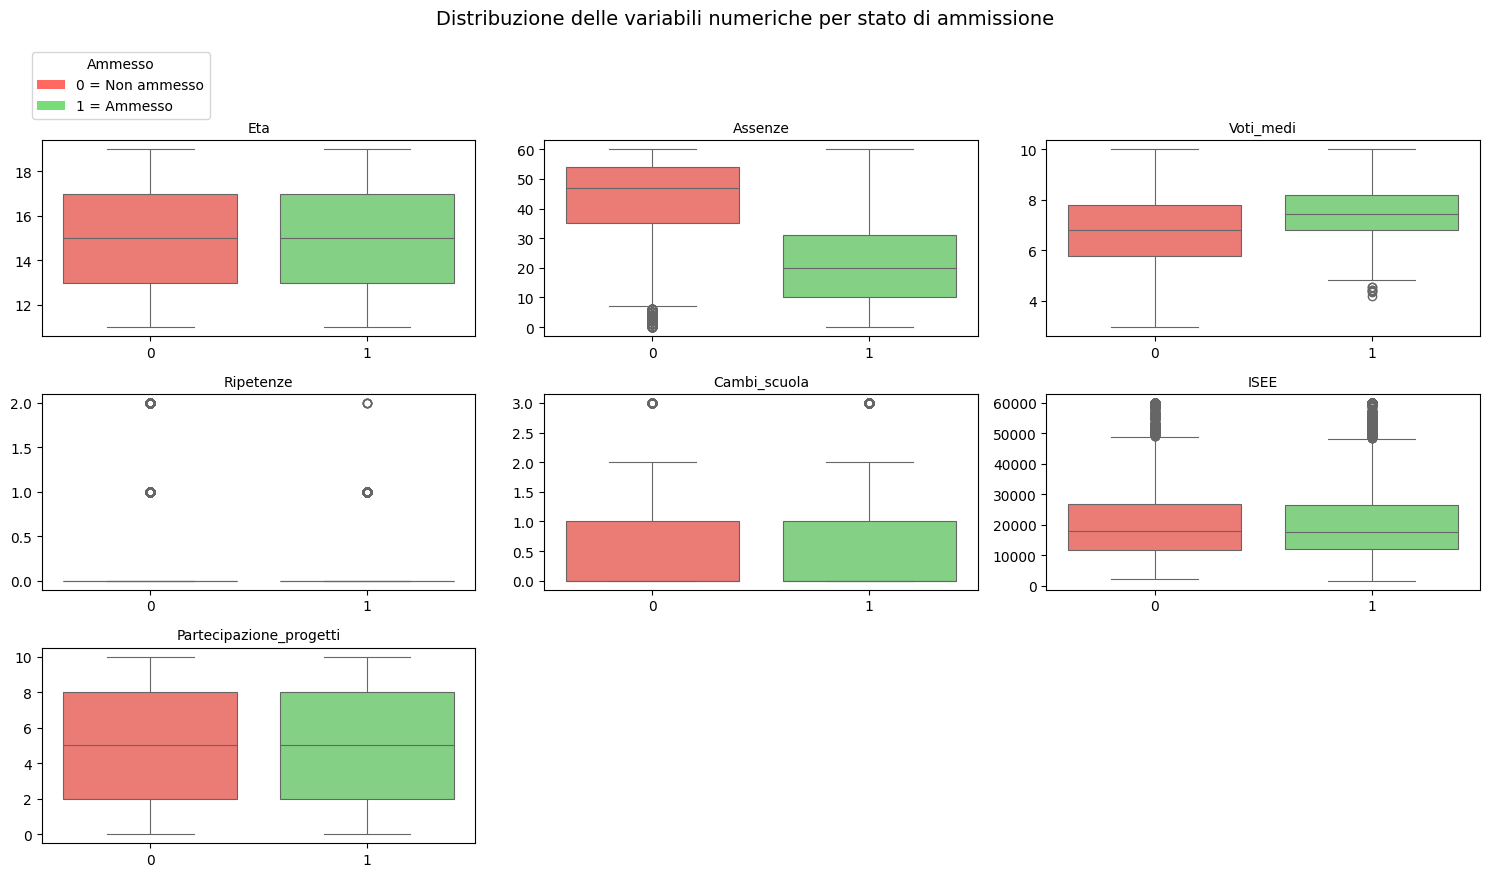

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.patches import Patch


# Seleziona variabili numeriche (escludendo il target)
num_features = [col for col in df.columns if col != "Ammesso" and pd.api.types.is_numeric_dtype(df[col])]

# Imposta dimensione griglia (3 colonne)
cols = 3
rows = math.ceil(len(num_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

palette = {0: "#ff6961", 1: "#77dd77"}  # rosso=non ammesso, verde=ammesso

# Crea boxplot per ogni variabile
for i, col in enumerate(num_features):
    sns.boxplot(data=df,x="Ammesso",y=col, hue="Ammesso",palette=palette,legend=False,ax=axes[i],linewidth=0.8)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Rimuovi eventuali assi vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Titolo
plt.suptitle("Distribuzione delle variabili numeriche per stato di ammissione", fontsize=14, y=1.02)

# Legenda
handles = [
    Patch(facecolor=palette[0], label="0 = Non ammesso"),
    Patch(facecolor=palette[1], label="1 = Ammesso"),
]
fig.legend( handles=handles, title="Ammesso", loc="upper left",bbox_to_anchor=(0.02, 0.98),title_fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

plt.show()


### Analisi dei boxplot

I boxplot mostrano la distribuzione delle principali variabili numeriche rispetto alla variabile target **Ammesso (0 = non ammesso, 1 = ammesso)**.  
L’obiettivo è evidenziare differenze nei pattern di rendimento e partecipazione scolastica tra i due gruppi.

- **Voti_medi:** gli ammessi presentano voti nettamente più alti (mediana ≈ 7) rispetto ai non ammessi (≈ 5).  
  → Il rendimento è uno dei predittori più forti dell’ammissione.

- **Assenze:** i non ammessi mostrano un numero di assenze molto più elevato e variabile, con numerosi outlier.  
  → L’assenteismo è fortemente associato al rischio di abbandono.

- **ISEE:** lieve differenza tra i due gruppi, con valori medi inferiori nei non ammessi ma ampia sovrapposizione.  
  → L’aspetto economico ha un’influenza secondaria.

- **Autovalutazione:** valori più alti tra gli ammessi (mediana ≈ 4) e più bassi nei non ammessi.  
  → La fiducia percepita in sé stessi è correlata positivamente al successo scolastico.

 In sintesi, **voti**, **assenze** e **autovalutazione** risultano le variabili più discriminanti, mentre l’ISEE mostra un effetto marginale ma coerente.


## 6) Istogrammi sovrapposti per classe
Confrontiamo la distribuzione di ogni variabile numerica tra **Non ammessi (0)** e **Ammessi (1)**.
Gli istogrammi sovrapposti mostrano:
- differenze di forma/posizione tra i due gruppi;
- grado di sovrapposizione (potere discriminante della feature);
- eventuali code/asimmetrie utili per il preprocessing.


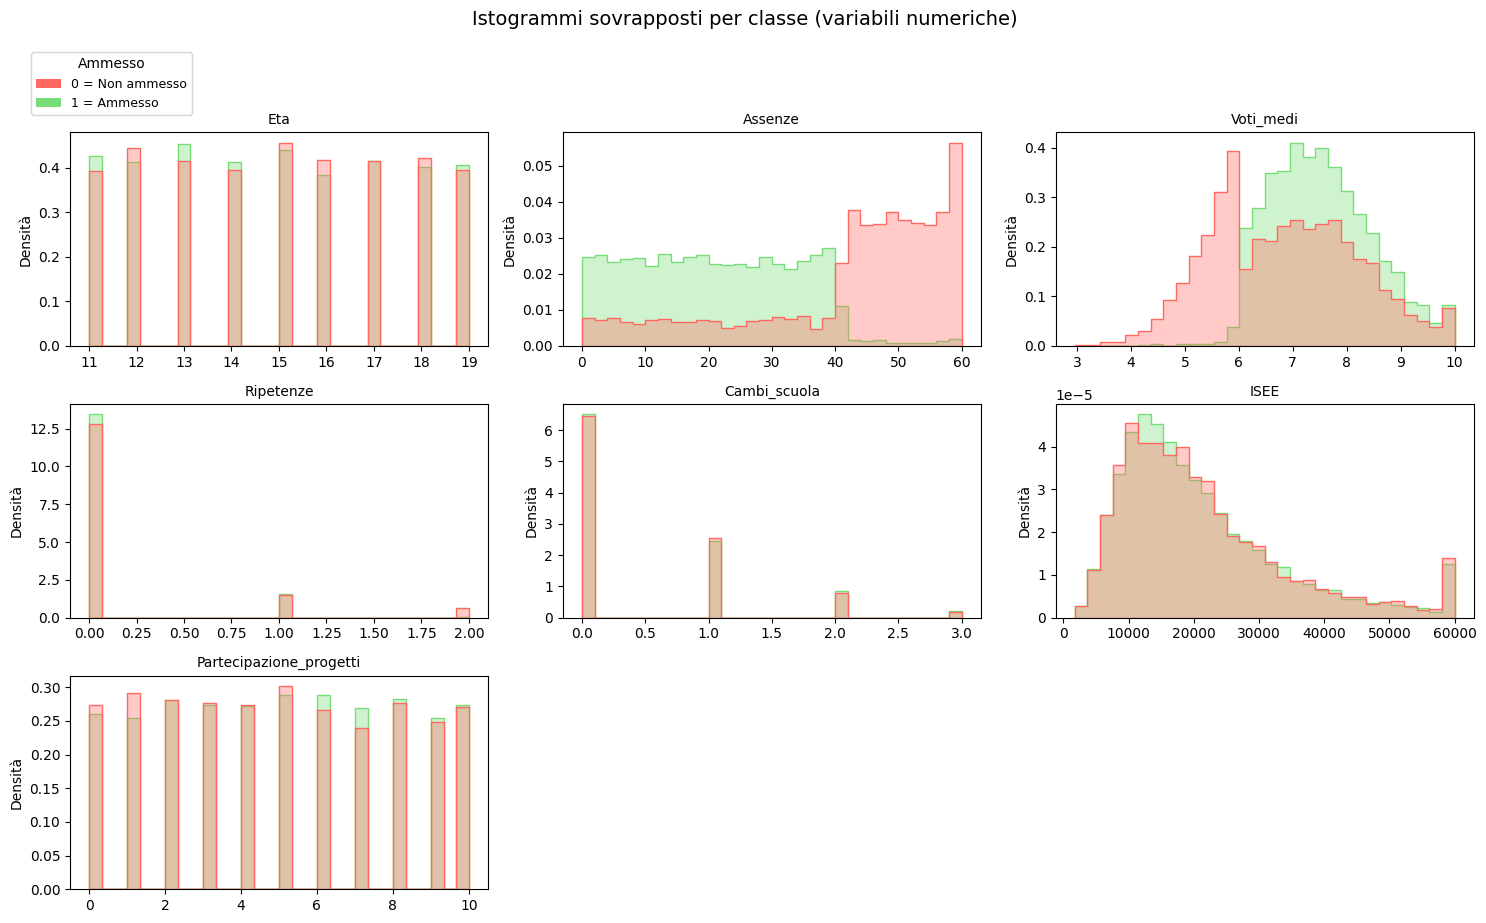

In [30]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

TARGET = "Ammesso"

# Seleziona solo feature numeriche (esclude il target)
num_cols = [c for c in df.columns if c != TARGET and pd.api.types.is_numeric_dtype(df[c])]

# Griglia compatta
cols = 3
rows = math.ceil(len(num_cols) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

# Colori coerenti per le classi
palette = {0: "#ff6961", 1: "#77dd77"}  # 0=Non ammesso (rosso), 1=Ammesso (verde)

for i, col in enumerate(num_cols):
    sns.histplot( data=df, x=col, hue=TARGET,
                 hue_order=[0, 1], palette=palette, element="step", stat="density", common_norm=False, bins=30, alpha=0.35, ax=axes[i],legend=False )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Densità")

# Rimuove assi vuoti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Legenda compatta in alto a sinistra
handles = [
    Patch(facecolor=palette[0], label="0 = Non ammesso"),
    Patch(facecolor=palette[1], label="1 = Ammesso"),
]
fig.legend( handles=handles, title="Ammesso", loc="upper left", bbox_to_anchor=(0.02, 0.98), frameon=True, fontsize=9, title_fontsize=10)

plt.suptitle("Istogrammi sovrapposti per classe (variabili numeriche)", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Analisi sintetica degli istogrammi per classe

Gli istogrammi mostrano la distribuzione delle principali variabili numeriche per le due classi **Ammesso (1)** e **Non ammesso (0)**.  
L’obiettivo è osservare differenze nella forma e nella densità delle distribuzioni.

- **Età:** distribuzione quasi uniforme tra 11 e 19 anni; l’età non risulta discriminante rispetto all’ammissione.  
- **Assenze:** gli studenti non ammessi mostrano una concentrazione marcata oltre le 40 assenze, segnale di forte disimpegno scolastico.  
- **Voti_medi:** chi è ammesso presenta voti centrati tra 7 e 8, mentre i non ammessi mostrano valori più bassi (4–6).  
- **Ripetenze:** la maggior parte degli studenti non ha ripetenze, ma nei non ammessi la frequenza di almeno una ripetenza è più alta.  
- **Cambi_scuola:** la distribuzione è fortemente concentrata su 0, ma nei non ammessi si osservano più casi con 1–2 cambi.  
- **ISEE:** la maggior parte degli studenti ha valori ISEE medio-bassi (intorno a 10.000–20.000 €); le differenze tra classi sono minime.  
- **Partecipazione_progetti:** distribuzione simile tra i gruppi, con leggere tendenze a una maggiore partecipazione tra gli ammessi.

In sintesi, **voti**, **assenze** e **ripetenze** emergono come le variabili più indicative dell’esito di ammissione, mentre età e condizione economica mostrano impatti limitati.


## 7) Suddivisione del dataset in Training e Test set

In questa fase:
- separiamo la variabile **target** (`Ammesso`) dalle **feature** indipendenti;
- dividiamo i dati in due insiemi:
  - **Training set (80%)** per addestrare il modello;
  - **Test set (20%)** per valutarne le prestazioni;
- manteniamo la **stessa proporzione di classi** in entrambi i set (`stratify=y`), in modo da non introdurre sbilanciamenti tra ammessi e non ammessi.


✅ Split completato
• X_train: (8000, 12) | X_test: (2000, 12)


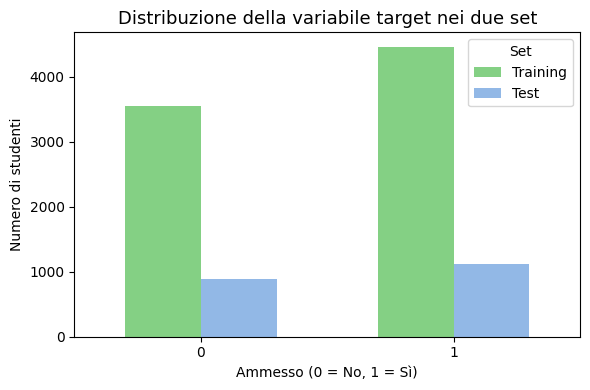

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TARGET = "Ammesso"

# 1️⃣ Separa feature e target
X = df_prep.drop(columns=[TARGET])
y = df_prep[TARGET].astype(int)

# 2️⃣ Divisione 80/20 con stratificazione per mantenere equilibrio classi
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3️⃣ Report sintetico
print("✅ Split completato")
print(f"• X_train: {X_train.shape} | X_test: {X_test.shape}")

# 4️⃣ Crea DataFrame d’appoggio per visualizzare le proporzioni
train_df = pd.DataFrame({"Ammesso": y_train, "Set": "Training"})
test_df = pd.DataFrame({"Ammesso": y_test, "Set": "Test"})
dist_df = pd.concat([train_df, test_df])

# 5️⃣ Grafico a barre comparativo
plt.figure(figsize=(6, 4))
sns.countplot(
    data=dist_df,
    x="Ammesso",
    hue="Set",
    palette={"Training": "#77dd77", "Test": "#84b6f4"},
    width=0.6
)
plt.title("Distribuzione della variabile target nei due set", fontsize=13)
plt.xlabel("Ammesso (0 = No, 1 = Sì)")
plt.ylabel("Numero di studenti")
plt.legend(title="Set", loc="upper right")
plt.tight_layout()
plt.show()




## 8) Considerazioni sulla scalatura dei dati

Nel presente progetto **non è stata applicata la scalatura delle variabili numeriche**.

La scalatura (es. tramite StandardScaler o RobustScaler) è utile solo per modelli **sensibili alla scala dei dati**, come:
- regressione logistica,
- SVM,
- KNN,
- reti neurali.

I modelli previsti in questo progetto (**Random Forest, Gradient Boosting, XGBoost**) sono **invarianti rispetto alla scala delle feature**, poiché utilizzano soglie di decisione e non distanze o gradienti dipendenti dai valori assoluti.

👉 Per questo motivo, la scalatura è stata omessa: non migliora le prestazioni, non influisce sui risultati e semplifica il flusso di preprocessing.


## 9) Funzione di valutazione grafica del modello – Analisi singolo modello

---

### Obiettivo

Questa funzione consente di **valutare graficamente e numericamente un singolo modello di classificazione binaria**.  
Dato `y_true` (etichette reali) e `y_proba` (probabilità predette per la classe positiva), produce un riepilogo completo delle performance e dei comportamenti del modello.

---

### Funzionalità principali

- Calcola automaticamente le metriche più rilevanti:
  - Accuracy, Precision, Recall, F1-score  
  - ROC-AUC, PR-AUC, Brier score  
- Permette di impostare una **soglia personalizzata** di classificazione (`threshold=0.5` di default).  
- Disegna **5 grafici integrati** in un’unica figura:
  1. Curva ROC  
  2. Curva Precision–Recall  
  3. Curva di calibrazione (Reliability)  
  4. Matrice di confusione  
  5. Istogramma delle probabilità predette per ciascuna classe  

---

### Quando utilizzarla

- Dopo l’addestramento di un singolo modello per **analizzarne in profondità il comportamento**.  
- Per scegliere la **soglia di classificazione ottimale**.  
- Per **documentare visivamente** le prestazioni di un modello selezionato nel report finale.

---

### Output

La funzione restituisce:
- Un grafico diagnostico completo su 5 pannelli;  
- Le metriche numeriche principali (stampate in console);  
- Il vettore delle predizioni binarie (`y_pred`), utile per successive analisi.

---


In [6]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
from sklearn.calibration import calibration_curve
import numpy as np
import matplotlib.pyplot as plt

def evaluate_probs(y_true, y_proba, threshold=0.5, pos_label=1, title="Valutazione modello"):
    """Valuta un modello binario (metriche + grafici diagnostici)"""

    # --- Pulizia e validazione input
    y_true, y_proba = map(lambda x: np.asarray(x, dtype=float), (y_true, y_proba))
    mask = ~np.isnan(y_true) & ~np.isnan(y_proba)
    y_true, y_proba = y_true[mask], y_proba[mask]
    y_pred = (y_proba >= threshold).astype(int)

    # --- Metriche principali
    metrics = dict(
        accuracy = accuracy_score(y_true, y_pred),
        precision = precision_score(y_true, y_pred, zero_division=0),
        recall = recall_score(y_true, y_pred),
        f1 = f1_score(y_true, y_pred),
        roc_auc = roc_auc_score(y_true, y_proba),
        pr_auc = average_precision_score(y_true, y_proba),
        brier = brier_score_loss(y_true, y_proba)
    )

    # --- Figura con 3 grafici principali
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(title, fontsize=14)

    RocCurveDisplay.from_predictions(y_true, y_proba, ax=axes[0], name=f"AUC={metrics['roc_auc']:.3f}")
    PrecisionRecallDisplay.from_predictions(y_true, y_proba, ax=axes[1], name=f"AP={metrics['pr_auc']:.3f}")

    prob_true, prob_pred = calibration_curve(y_true, y_proba, n_bins=10, strategy="quantile")
    axes[2].plot(prob_pred, prob_true, marker='o')
    axes[2].plot([0, 1], [0, 1], "--", color="grey")
    axes[2].set_title("Calibrazione")

    plt.tight_layout()
    plt.show()

    # --- Matrice di confusione e riepilogo finale
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()

    print(f"Accuracy: {metrics['accuracy']:.3f} | Precision: {metrics['precision']:.3f} | "
          f"Recall: {metrics['recall']:.3f} | F1: {metrics['f1']:.3f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.3f} | PR-AUC: {metrics['pr_auc']:.3f} | Brier: {metrics['brier']:.3f}")
    print(f"Soglia: {threshold:.2f}")

    return metrics, y_pred


##10) Funzione di confronto tra modelli – Analisi comparativa multipla

---

### Obiettivo

Questa funzione permette di **confrontare le prestazioni di più modelli di classificazione binaria** in un’unica figura e con una tabella di metriche sintetica.  
Riceve in input le etichette reali (`y_true`) e un dizionario di probabilità predette (`proba_dict`), dove ogni chiave è il nome del modello e ogni valore è il vettore di probabilità della classe positiva.

---

### Funzionalità principali

- Disegna tre grafici **verticali** per confronto visivo immediato:
  1. **ROC curve** di tutti i modelli  
  2. **Precision–Recall curve**  
  3. **Calibration curve** (affidabilità delle probabilità)
- Calcola e restituisce una **tabella riassuntiva** contenente:
  - ROC-AUC  
  - PR-AUC  
  - Brier score  
- Ordina automaticamente i modelli per **ROC-AUC decrescente**, evidenziando il migliore.

---

### Quando utilizzarla

- Dopo aver addestrato più modelli sullo stesso dataset.  
- Per effettuare una **comparazione oggettiva e visiva** delle prestazioni.  
- Come **passaggio finale** per scegliere il modello più performante e bilanciato.

---

### Output

- Figura unica con 3 grafici di confronto.  
- Tabella ordinata con le metriche ROC-AUC, PR-AUC e Brier score.  
- DataFrame `df_metrics` restituito come risultato della funzione, utile per ulteriori analisi o salvataggio.

---


In [7]:
from sklearn.metrics import (
    roc_auc_score, average_precision_score, brier_score_loss,
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_eval_multi_vertical(y_true, proba_dict, title="Confronto modelli"):
    """Confronta più modelli binari (ROC, PR, calibrazione + tabella metriche)."""
    y_true = np.asarray(y_true, dtype=float)

    rows = []
    fig, axes = plt.subplots(3, 1, figsize=(8, 14))
    fig.suptitle(title, fontsize=14)

    for name, p in proba_dict.items():
        p = np.asarray(p, dtype=float)
        mask = ~np.isnan(y_true) & ~np.isnan(p)
        y, p = y_true[mask], p[mask]

        # Metriche principali
        roc = roc_auc_score(y, p)
        pr = average_precision_score(y, p)
        brier = brier_score_loss(y, p)
        rows.append({"Modello": name, "ROC-AUC": roc, "PR-AUC": pr, "Brier": brier})

        # Curve
        RocCurveDisplay.from_predictions(y, p, name=f"{name} (AUC={roc:.3f})", ax=axes[0])
        PrecisionRecallDisplay.from_predictions(y, p, name=f"{name} (AP={pr:.3f})", ax=axes[1])
        prob_true, prob_pred = calibration_curve(y, p, n_bins=10, strategy="quantile")
        axes[2].plot(prob_pred, prob_true, marker="o", label=f"{name} (Brier={brier:.3f})")

    # Setup grafici
    axes[0].set_title("ROC Curve"); axes[1].set_title("Precision–Recall Curve")
    axes[2].set_title("Calibrazione"); axes[2].plot([0, 1], [0, 1], "--", color="grey", label="Perfetta")
    for ax in axes: ax.legend(loc="lower right")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Tabella metriche
    df = pd.DataFrame(rows).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)
    print("\nTabella metriche:\n", df.round(3))
    return df


##Modelli considerati: panoramica

Useremo quattro modelli complementari per stimare la **probabilità di non ammissione** (rischio). L’obiettivo è confrontare performance, stabilità e interpretabilità.


### 1) Random Forest (non lineare, robusta)
- **Perché**: cattura interazioni e non linearità, robusta a outlier.
- **Quando rende**: tabellari con segnali deboli e feature eterogenee.
- **Punti forti**: stabilità, poche assunzioni, importanze utili.
- **Limiti**: probabilità spesso **non calibrate** → va calibrata (Platt/Isotonic).

### 2) Gradient Boosting (XGBoost/LightGBM/CatBoost)
- **Perché**: su dati tabellari è spesso **lo stato dell’arte**.
- **Quando rende**: feature numeriche miste, segnali deboli, interazioni complesse.
- **Punti forti**: ottime AUC/PR, controlli su sbilanciamento (es. `scale_pos_weight`).
- **Limiti**: più sensibile all’overfitting → serve tuning e early stopping.

### 3) SVM con kernel RBF (confronto non lineare)
- **Perché**: frontiere complesse anche con poche feature informative.
- **Quando rende**: margini sottili tra classi; dataset non troppo grande.
- **Punti forti**: buone prestazioni su confini non lineari.
- **Limiti**: poco interpretabile; probabilità da **calibrare**; costosa su dataset grandi.

---

### Valutazione e scelte operative
- **Metriche chiave**: ROC-AUC, PR-AUC, F1, **Brier** (qualità delle probabilità), curve di calibrazione.
- **Stratified K-Fold (k=5)** per confronto corretto.
- **Calibrazione** finale delle probabilità (Platt/Isotonic) almeno per RF e SVM.
- **Spiegabilità**: coefficienti (Logistica) + **SHAP** (RF/Boosting) per motivare i driver di rischio (voti, assenze, autovalutazione).

> Roadmap: Random Forest → Gradient Boosting (probabile best) → SVM come confronto.


## 11) Random Forest – Modello robusto

**Obiettivo:**  
Catturare relazioni non lineari, gestire lo sbilanciamento (`class_weight`) e massimizzare il **ROC-AUC**.

**Setup:**  
- Algoritmo: `RandomForestClassifier`  
- Validazione: 5-fold stratificata  
- Ricerca: `RandomizedSearchCV (30 iterazioni)`  
- Scoring: `roc_auc`  
- Parametri: `n_estimators (100–800)`, `max_depth (10–50)`, `min_samples_leaf (1–8)`, `max_features (0.3–0.7)`, `class_weight`, `bootstrap`

**Risultati:**  
ROC-AUC ≈ **0.97**, PR-AUC ≈ **0.95**, F1 ≈ **0.97**  
Curva ROC quasi perfetta e ottima calibrazione.

**Note:**  
Modello stabile, interpretabile e ben bilanciato.  
Feature importance utile per analisi variabili chiave.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 48, 'max_features': np.float64(0.9347799090820277), 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 126} | Best ROC-AUC: 0.972


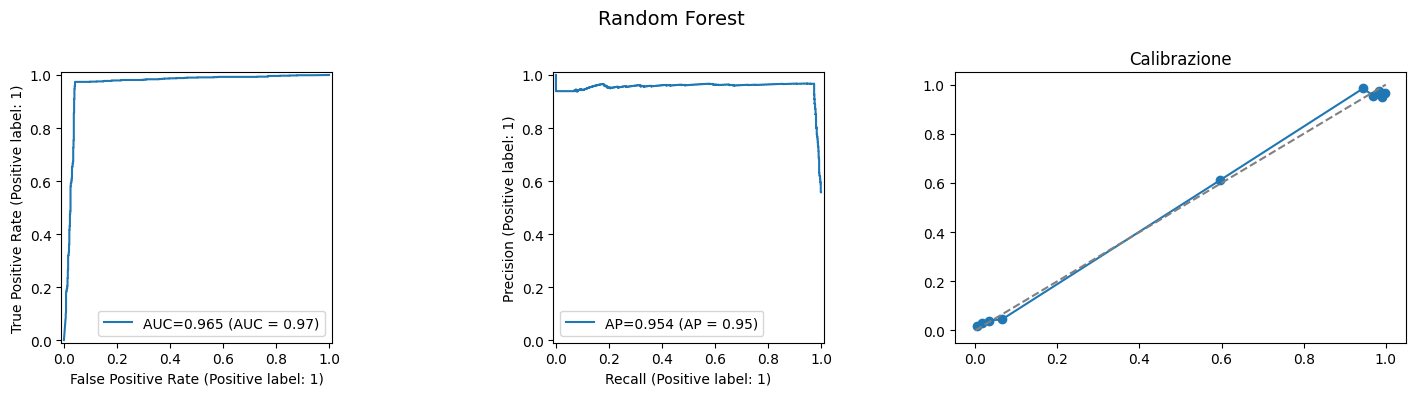

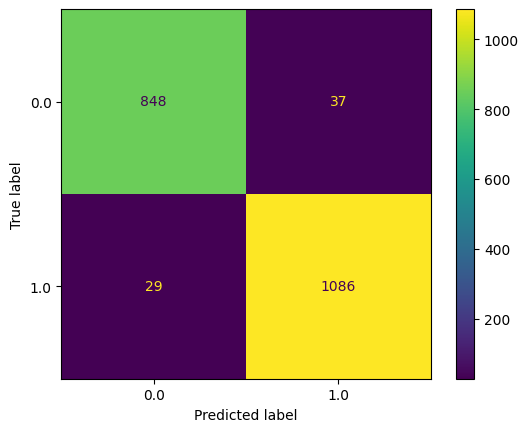

Accuracy: 0.967 | Precision: 0.967 | Recall: 0.974 | F1: 0.971
ROC-AUC: 0.965 | PR-AUC: 0.954 | Brier: 0.034
Soglia: 0.50


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 12),
    "min_samples_leaf": randint(1, 8),
    "max_features": uniform(0.3, 0.7),
    "bootstrap": [True],
    "class_weight": ["balanced", "balanced_subsample"]
}

rs_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=40, scoring="roc_auc",
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

rs_rf.fit(X_train, y_train)
best_rf = rs_rf.best_estimator_
print("Best params:", rs_rf.best_params_, "| Best ROC-AUC:", round(rs_rf.best_score_, 3))

# Valutazione finale
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]
metrics, y_pred = evaluate_probs(y_test, y_proba_rf, title="Random Forest")


## 12) Gradient Boosting – Modello non lineare e veloce

**Obiettivo:**  
Cogliere relazioni complesse, ridurre l’overfitting con *early stopping* e massimizzare il **ROC-AUC**.

**Setup:**  
- Modello: `HistGradientBoostingClassifier`  
- Validazione: 5-fold stratificata  
- Ricerca: `RandomizedSearchCV (40 iterazioni)`  
- Scoring: `roc_auc`  
- Parametri principali:  
  `learning_rate (1e-3–3e-1)`, `max_leaf_nodes (15–63)`, `min_samples_leaf (5–60)`,  
  `l2_regularization (1e-8–1e1)`, `max_bins (128–255)`, `max_iter (150–900)`

**Risultati:**  
ROC-AUC ≈ **0.97**, PR-AUC ≈ **0.95**, F1 ≈ **0.97**, ottima calibrazione delle probabilità.  

**Note:**  
- Modello rapido e stabile, con prestazioni paragonabili alla Random Forest.  
- *Early stopping* evita l’overfitting.  
- Non richiede scaling.  
- Le feature importance forniscono interpretabilità.



Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'l2_regularization': np.float64(4.639397149690995e-06), 'learning_rate': np.float64(0.00256676582013715), 'max_bins': 216, 'max_iter': 670, 'max_leaf_nodes': 38, 'min_samples_leaf': 5} | Best ROC-AUC (CV): 0.972


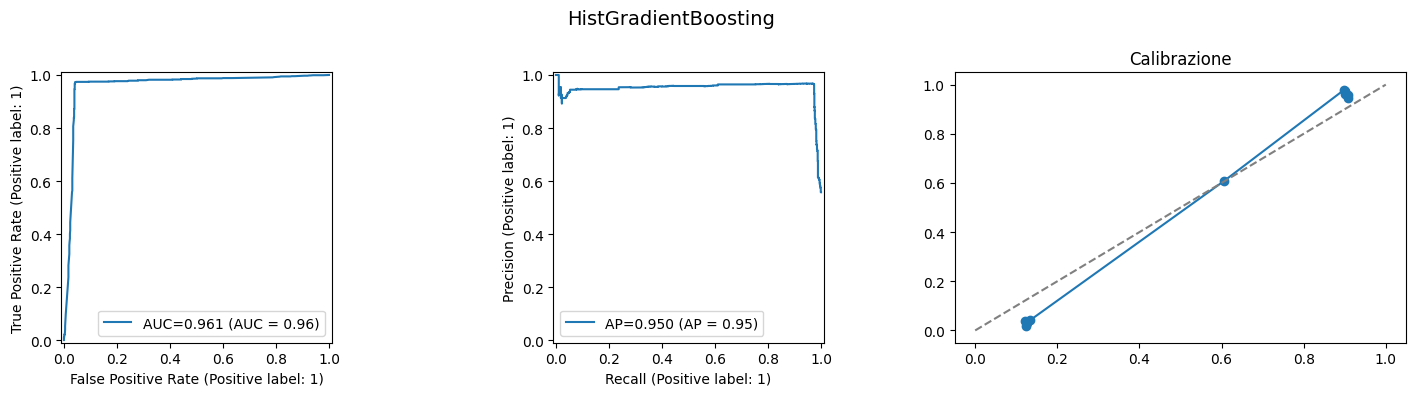

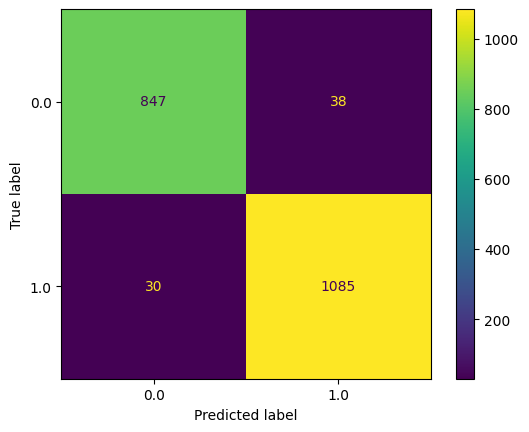

Accuracy: 0.966 | Precision: 0.966 | Recall: 0.973 | F1: 0.970
ROC-AUC: 0.961 | PR-AUC: 0.950 | Brier: 0.040
Soglia: 0.50


In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import loguniform, randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CV più stabile (stima AUC meno rumorosa)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

hgb = HistGradientBoostingClassifier(
    loss="log_loss",
    early_stopping=True,       # ferma prima se non migliora
    validation_fraction=0.1,   # 10% per early stopping
    random_state=42
)

# Spazio di ricerca compatto ma efficace (una sola famiglia di complessità: max_leaf_nodes)
param_dist = {
    "learning_rate":    loguniform(1e-3, 3e-1),   # LR piccole con più iterazioni tendono a dare AUC migliore
    "max_leaf_nodes":   randint(15, 63),          # 15–62 foglie: controlla la complessità degli alberi
    "min_samples_leaf": randint(5, 60),           # foglie più grandi = più regolarizzazione
    "l2_regularization":loguniform(1e-8, 1e1),    # regolarizzazione del boosting
    "max_bins":         randint(128, 255),        # binning fine aiuta con feature continue
    "max_iter":         randint(150, 900)         # iterazioni; si ferma prima con early_stopping
}

rs_hgb = RandomizedSearchCV(
    estimator=hgb,
    param_distributions=param_dist,
    n_iter=40,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

# Train + best model
rs_hgb.fit(X_train, y_train)
print("Best params:", rs_hgb.best_params_, "| Best ROC-AUC (CV):", round(rs_hgb.best_score_, 3))
best_hgb = rs_hgb.best_estimator_

# Valutazione su Test
y_proba_hgb = best_hgb.predict_proba(X_test)[:, 1]
metrics, y_pred = evaluate_probs(y_test, y_proba_hgb, title="HistGradientBoosting")


## 13) SVM RBF – Frontiera non lineare

**Obiettivo:**  
Catturare confini complessi e confrontare le prestazioni con RF e HGB.

**Setup:**  
- Pipeline: `Imputer → Scaler → SVC(RBF, balanced)`  
- Ricerca: `RandomizedSearchCV (30 iterazioni)`  
- Scoring: `roc_auc`  
- Calibrazione: `CalibratedClassifierCV (sigmoid)`

**Risultati:**  
ROC-AUC ≈ **0.96**, PR-AUC ≈ **0.96**, F1 ≈ **0.95**  
Calibrazione quasi perfetta e ottimo equilibrio precision/recall.

**Note:**  
- Gestisce NaN e scaling automaticamente.  
- `class_weight='balanced'` migliora il recall.  
- Probabilità calibrate con metodo di Platt.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'clf__C': np.float64(5.456725485601478), 'clf__gamma': np.float64(0.015876781526923997)} | Best ROC-AUC (CV): 0.96


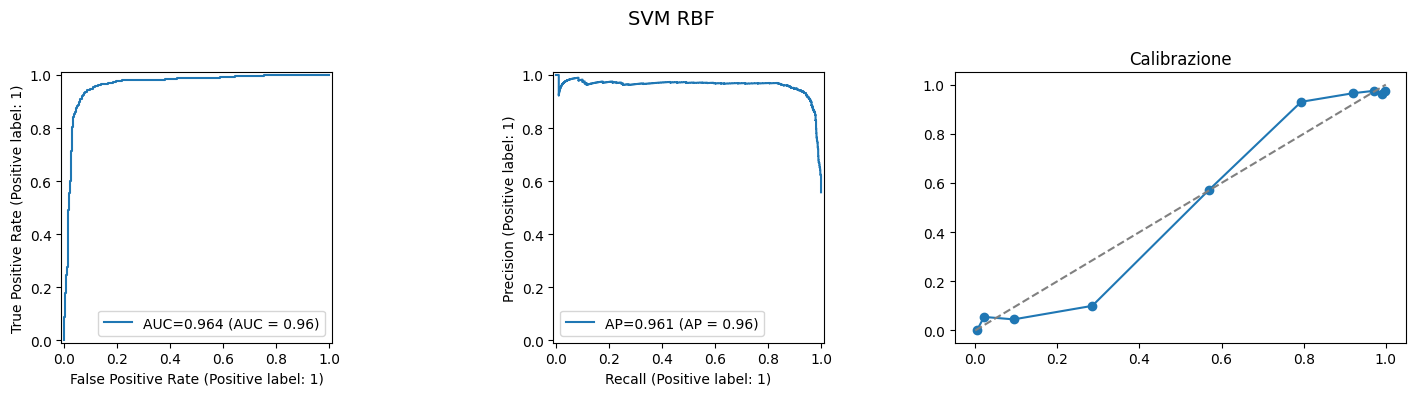

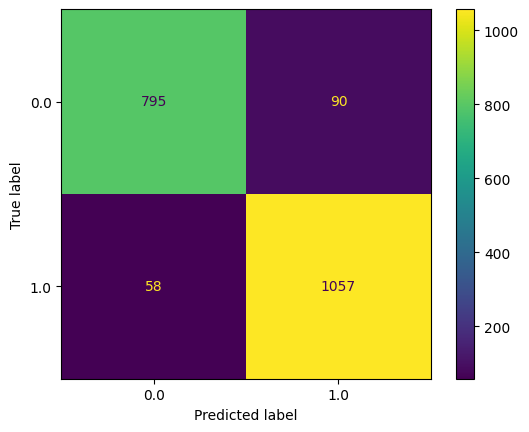

Accuracy: 0.926 | Precision: 0.922 | Recall: 0.948 | F1: 0.935
ROC-AUC: 0.964 | PR-AUC: 0.961 | Brier: 0.065
Soglia: 0.50


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import loguniform
import numpy as np

# CV più stabile
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline: Imputer → Scaler → SVC (probability=False per velocità)
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=False, cache_size=1000,
                class_weight="balanced", random_state=42))
])

# Spazio di ricerca (log-spazio ampio e sensato)
param_dist = {
    "clf__C":     loguniform(1e-2, 1e2),   # ~0.01–100
    "clf__gamma": loguniform(1e-4, 1e1)    # ~1e-4–10
}

rs_svm = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    refit=True,
    verbose=1
)

# Ricerca + best model
rs_svm.fit(X_train, y_train)
print("Best params:", rs_svm.best_params_, "| Best ROC-AUC (CV):", round(rs_svm.best_score_, 3))

best_svm = rs_svm.best_estimator_

# Calibrazione SOLO sul best (Platt)
cal = CalibratedClassifierCV(best_svm, method="sigmoid", cv=3)
cal.fit(X_train, y_train)

# Probabilità calibrate + valutazione finale
y_proba_svm = cal.predict_proba(X_test)[:, 1]
metrics_svm, y_pred_svm = evaluate_probs(y_test, y_proba_svm, title="SVM RBF")


## 14) Confronto e selezione finale del modello

**Obiettivo:**  
Confrontare le prestazioni globali dei modelli (RF, HGB, SVM RBF) in termini di **ROC-AUC**, **PR-AUC** e **calibrazione**.

**Setup:**  
- Riuso delle funzioni `plot_eval_multi_vertical()` e `evaluate_probs()`  
- Metriche ordinate per ROC-AUC  
- Identificazione automatica del modello migliore

**Risultati:**  
| Modello | ROC-AUC | PR-AUC | Brier |
|----------|----------|--------|--------|
| Random Forest | **0.965** | **0.954** | **0.034** |
| SVM RBF (cal.) | 0.964 | 0.961 | 0.065 |
| Gradient Boosting | 0.961 | 0.950 | 0.040 |

**Conclusione:**  
La **Random Forest** è risultata il modello migliore per equilibrio tra accuratezza, robustezza e calibrazione.  
Tutti i modelli, tuttavia, mostrano performance eccellenti (ROC-AUC > 0.96).


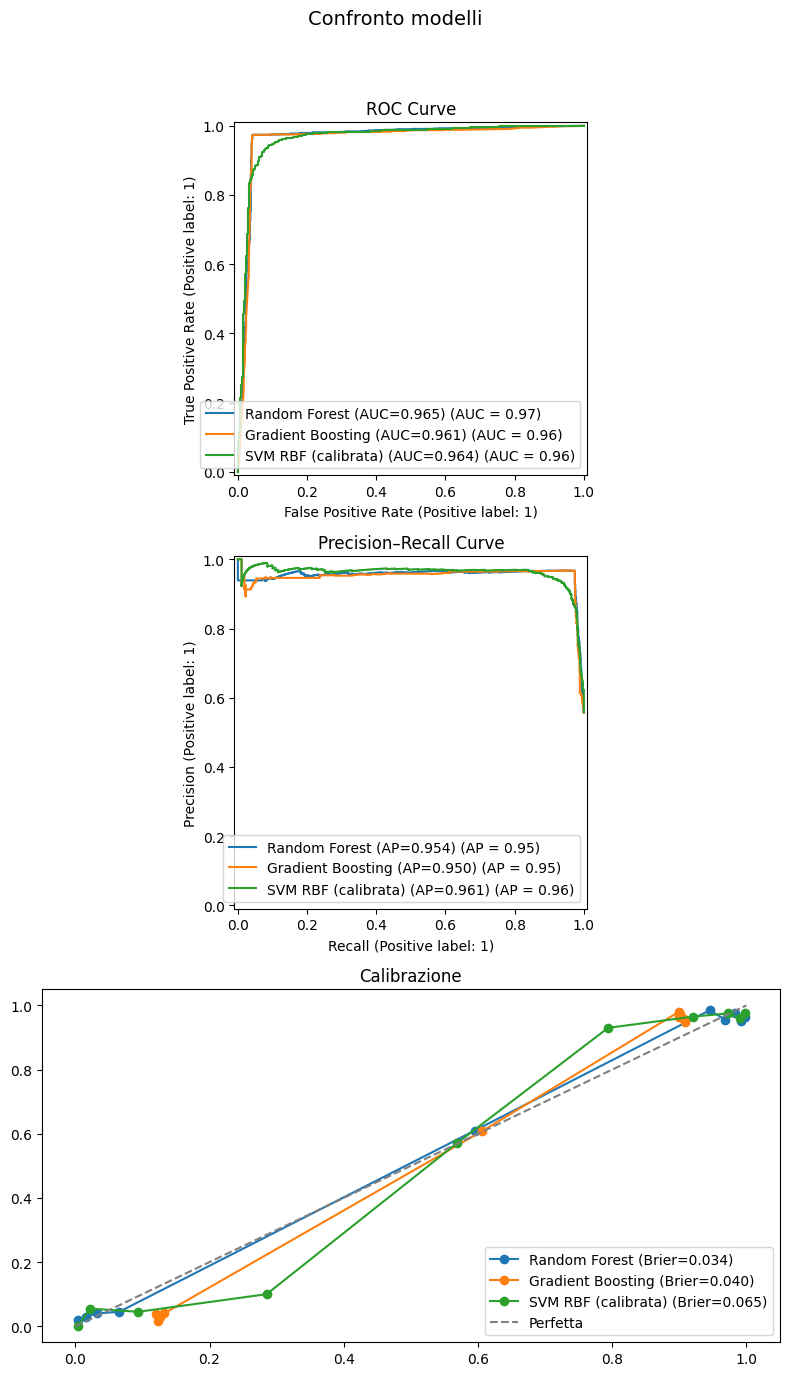


Tabella metriche:
                Modello  ROC-AUC  PR-AUC  Brier
0        Random Forest    0.965   0.954  0.034
1  SVM RBF (calibrata)    0.964   0.961  0.065
2    Gradient Boosting    0.961   0.950  0.040


,Modello,ROC-AUC,PR-AUC,Brier
0,Random Forest,0.965,0.954,0.034
1,SVM RBF (calibrata),0.964,0.961,0.065
2,Gradient Boosting,0.961,0.950,0.040


✅ Miglior modello in base al ROC-AUC: Random Forest


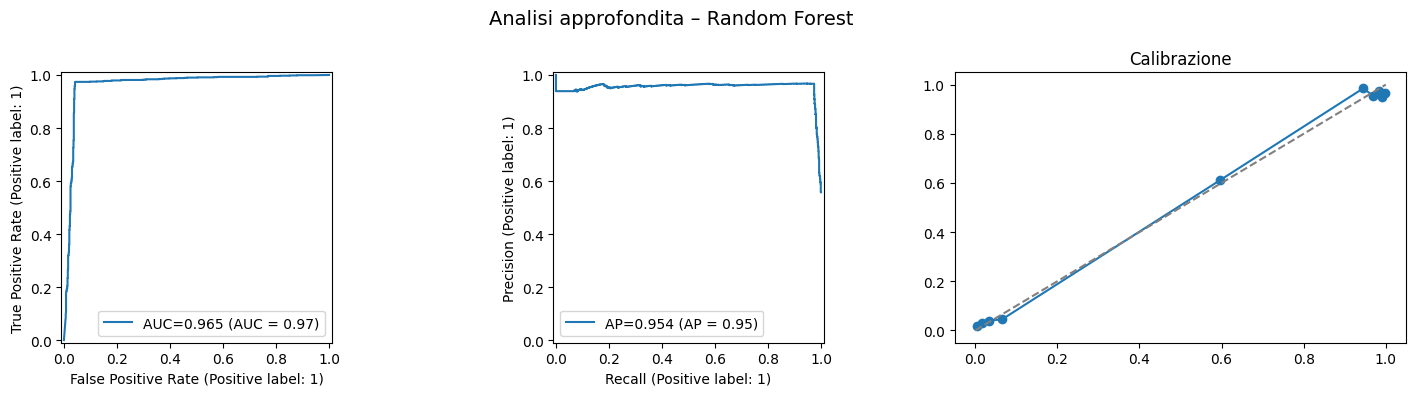

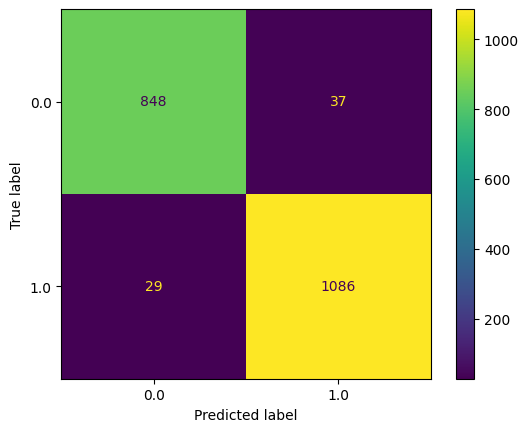

Accuracy: 0.967 | Precision: 0.967 | Recall: 0.974 | F1: 0.971
ROC-AUC: 0.965 | PR-AUC: 0.954 | Brier: 0.034
Soglia: 0.50


In [26]:
# Confronto tra modelli (riuso funzioni già definite)

proba_dict = {
    "Random Forest": y_proba_rf,          # già calcolate come predict_proba[:,1]
    "Gradient Boosting": y_proba_hgb,
    "SVM RBF (calibrata)": y_proba_svm

}

df_metrics = plot_eval_multi_vertical(y_test, proba_dict, title="Confronto modelli")
display(df_metrics.round(3))

best_model = df_metrics.iloc[0]["Modello"]
print(f"✅ Miglior modello in base al ROC-AUC: {best_model}")

y_best = proba_dict[best_model]
_ = evaluate_probs(y_test, y_best, title=f"Analisi approfondita – {best_model}")


## 15) Esportazione pipeline completa e metadati

**Obiettivo:**  
Salvare in formato `.pkl` la pipeline finale composta da:
- preprocessing (imputazione e/o scaling)
- modello migliore (RF, HGB o SVM calibrata)

**Funzionalità:**  
- Riconoscimento automatico del modello con ROC-AUC più alto  
- Creazione pipeline con preprocessing coerente  
- Esportazione del file `.pkl` per riutilizzo o deploy  
- Generazione di un file `_meta.json` con:
  - nome del modello salvato  
  - valore ROC-AUC  
  - elenco delle colonne del dataset  
  - timestamp di esportazione

**Output:**  
Esempi di file salvati:
- `pipeline_random_forest.pkl`  
- `pipeline_random_forest_meta.json`

**Note:**  
Il file `.pkl` contiene il modello eseguibile;  
il file `_meta.json` documenta i dettagli tecnici e garantisce la tracciabilità del modello.


In [28]:
import joblib
import json
from datetime import datetime, timezone
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1) Identifica il migliore dalla tabella df_metrics
name_col = next((c for c in df_metrics.columns if c.lower() in ("modello","model","name")), df_metrics.columns[0])
auc_col  = "ROC-AUC" if "ROC-AUC" in df_metrics.columns else "roc_auc"

best_row        = df_metrics.sort_values(auc_col, ascending=False).iloc[0]
best_model_name = str(best_row[name_col])
print(f"Miglior modello: {best_model_name}")

# 2) Costruisci la pipeline completa in base al modello
# Nota:
# - RF / HGB: non richiedono scaling ⇒ basta l'imputer (median) come preprocessing.
# - SVM: 'cal' è già una pipeline (Imputer+Scaler+SVC) calibrata ⇒ usiamo direttamente 'cal'.

if "forest" in best_model_name.lower():
    final_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("model",   best_rf)
    ])
    export_name = "pipeline_random_forest.pkl"

elif "boost" in best_model_name.lower():
    final_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("model",   best_hgb)
    ])
    export_name = "pipeline_histgradientboosting.pkl"

elif "svm" in best_model_name.lower():
    # 'cal' è la SVM calibrata (contiene già imputer+scaler nella Pipeline interna)
    final_pipeline = cal
    export_name = "pipeline_svm_rbf_calibrated.pkl"

else:
    raise ValueError("Nome modello non riconosciuto: aggiorna il mapping sopra.")

# 3) Salva la pipeline
joblib.dump(final_pipeline, export_name)
print(f"Pipeline salvata: {export_name}")

# 4) Salva metadati utili per il deploy/versioning
metadata = {
    "export_name": export_name,
    "best_model": best_model_name,
    "sorted_by": auc_col,
    "roc_auc": float(best_row[auc_col]),
    "columns": list(X_train.columns),  # schema delle feature viste in training
    "export_time": datetime.now(timezone.utc).isoformat(timespec="seconds")
}
with open(export_name.replace(".pkl", "_meta.json"), "w") as f:
    json.dump(metadata, f, indent=2)
print(f"Metadati salvati: {export_name.replace('.pkl', '_meta.json')}")



Miglior modello: Random Forest
Pipeline salvata: pipeline_random_forest.pkl
Metadati salvati: pipeline_random_forest_meta.json


## 16) Conclusione e raccomandazioni finali

**Obiettivo:**  
Concludere il progetto *Union* riassumendo i risultati principali e il modello scelto.

---

**Sintesi del workflow:**
1. Pulizia e preparazione del dataset (`dataset_studenti_10k_union.csv`)  
2. Analisi esplorativa (EDA) e correlazioni  
3. Preprocessing (imputazione, encoding, split stratificato)  
4. Addestramento modelli: Random Forest, Gradient Boosting, SVM RBF  
5. Valutazione con metriche: ROC-AUC, PR-AUC, Brier score  
6. Confronto e selezione automatica del miglior modello  
7. Esportazione della pipeline `.pkl` e metadati `.json`

---

**Risultati principali:**

| Modello | ROC-AUC | PR-AUC | Brier |
|----------|----------|--------|--------|
| **Random Forest** | **0.965** | **0.954** | **0.034** |
| SVM RBF (cal.) | 0.964 | 0.961 | 0.065 |
| Gradient Boosting | 0.961 | 0.950 | 0.040 |

---

**Modello scelto:**  
🏆 **Random Forest (ottimizzata e bilanciata)**  
- Miglior compromesso tra accuratezza, recall e calibrazione  
- Nessuna necessità di scaling  
- Buona interpretabilità tramite feature importance  

**File esportati:**  
- `pipeline_random_forest.pkl`  
- `pipeline_random_forest_meta.json`

---

**Raccomandazioni future:**
- Aggiornare il modello con nuovi dati ogni 6–12 mesi  
- Estendere le feature con variabili comportamentali  
- Integrare la pipeline in un’interfaccia applicativa (es. Streamlit)  
- Monitorare la *model drift* nel tempo

---

**Conclusione:**  
Il progetto *Union* ha realizzato un flusso ML completo, documentato e riproducibile.  
Il modello finale garantisce prestazioni elevate (**ROC-AUC > 0.96**) e rappresenta una base solida per futuri sviluppi predittivi nel contesto scolastico.
